In [1]:
%matplotlib inline
import matplotlib
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 144

In [2]:
import numpy as np
from matplotlib import pylab as plt
from sklearn import svm

# Support Vector Machines (SVM)

Support Vector Machines are powerful tools in the machine learning toolbox.  We start with a simple idea to classify linearly separable data into two classes.  This is extended to non-separable data, non-linear boundaries, and multiple classes in the full-fledged SVM.  The ideas behind the SVM can be extended to regression and outlier dectection.

## Maximal Margin Classifier

Suppose we have two classes of observations that are linearly separable.  That means we can draw a *hyperplane* though our feature space such that all instances of one class are on one side of the hyperplane, and all instances of the other are on the opposite side.  (A hyperplace in $p$ dimensions is a $p-1$ dimensional subspace.  In the two-dimensional example that follows, a hyperplane is simply a line.)  In general, the equation for a hyperplane is

$$ x \cdot \tilde\beta + \tilde\beta_0 = 0 \, , $$

where $\tilde\beta$ is a $p$-vector and $\tilde\beta_0$ is a real number.  For convenience, we will require that $\|\tilde\beta\| = 1$, which means that the quantity $x \cdot \tilde\beta + \tilde\beta_0$ is the distance from point $x$ to the hyperplane.  Thus we can label our classes with $y = \pm 1$, and the requirement that the hyperplane divide the classes becomes

$$ y_j \left( X_{j\cdot} \cdot \tilde\beta + \tilde\beta_0 \right) \ge 0 \, .$$

The plot below displays two linearly separable classes and several candidate hyperplanes.

In [3]:
np.random.seed(42)
X1 = np.hstack((np.random.normal(1, 0.5, (2,100)), np.random.normal(-1, 0.5, (2, 100))))
y1 = np.hstack((np.ones((1,100)), np.zeros((1,100))))

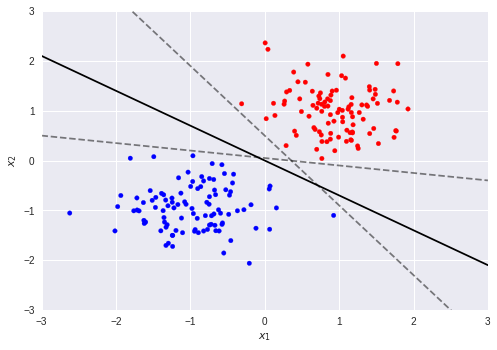

In [4]:
plt.scatter(*X1, c=y1, s=20, cmap=plt.cm.bwr)
x = np.linspace(-3, 3, 100)
plt.plot(x, -0.7*x, 'k')
plt.plot(x, -0.15*x + 0.05, 'k--', alpha=0.5)
plt.plot(x, -1.4*x + 0.5, 'k--', alpha=0.5)
plt.axis((-3, 3, -3, 3))
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

**Question:** How should we choose the best hyperplane?

The approach of the *Maximal Margin Classifier* is to choose the plane that results in the largest margin $M$ between the two classes.  That is, we choose $\tilde\beta_0$ and $\tilde\beta$ to maximize $M$, given the constraints

$$ y_j \left( X_{j\cdot} \cdot \tilde\beta + \tilde\beta_0 \right) \ge M \, .$$

Defining $\beta \equiv \tilde\beta / M$ and $\beta_0 \equiv \tilde\beta_0 / M$, we can rewrite this as

$$ y_j \left( X_{j\cdot} \cdot \beta + \beta_0 \right) \ge 1 \, .$$

Since $\|\tilde\beta\| = 1$, $\|\beta\| = \frac 1 M$ and we will attempt to minimize $\|\beta\|$.  The following plot shows the maximum margin classifier for the previous data set.  The area shaded grey indicates the margin.

In [6]:
def plot_SVC(X, y, C=1):
    clf = svm.SVC(kernel='linear', C=C).fit(X.T, y.ravel())
    b1, b2 = clf.coef_[0]
    b0 = clf.intercept_[0]

    xm = np.ceil(abs(X).max())
    x = np.linspace(-xm, xm, 100)
    plt.fill_between(x, (1 - b1 * x - b0) / b2, (-1 - b1 * x - b0) / b2,
                     color='k', alpha=0.3)
    plt.plot(x, (-b1 * x - b0) / b2, 'k')
    plt.scatter(*clf.support_vectors_.T, s=100, c='y')
    plt.scatter(*X, c=y, s=20, cmap=plt.cm.bwr)
    plt.axis((-xm, xm, -xm, xm))
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')

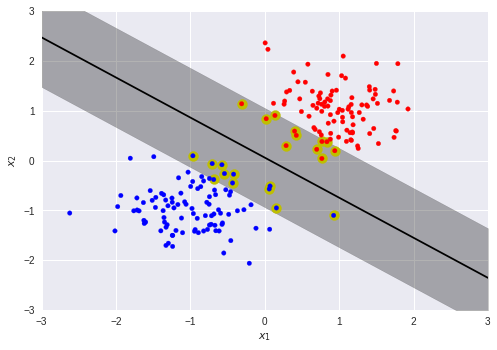

In [8]:
plot_SVC(X1, y1, 0.10)

It is worth noting that only three data points, highlighted in yellow, define the separating hyperplane.  These are called the *support vectors*.  Any other data point may be moved (slightly, at least) without changing the classification boundary, but any movement of the support vectors will move the boundary.

**Question:** With their dependence on only a few support vectors, do maximal margin classifers tend to be high bias or high variance?

## Linear SVM

In general, classes are not linearly separable.  This may be because the class boundary is not linear, but often there is no clear boundary.  To deal with this case, the support vector machine adds a set of *slack variables* $\xi_j$, which forgive excursions of a few points into, or even across, the margin.  We want to minimize the total amount of slack while maximizing the  width of the margin.  The objective becomes

$$
\min_{\beta, \beta_0} \frac 1 2 \|\beta\|^2 + C \sum_j \xi_j \\
\mbox{subject to } \left\{ \begin{array} {cl} 
 y_j (X_{j\cdot} \cdot \beta + \beta_0) \ge (1-\xi_j) & \mbox{for } j = 1,\ldots,N \\
 \xi_j \ge 0 & \mbox{for } j = 1,\ldots,N 
\end{array}\right.
$$

for some constant $C$.  The constant $C$ represents the "cost" of the slack.  When $C$ is small, it is efficient to allow more points into the margin in order to acheive a larger margin.  Larger $C$ will produce boundaries with fewer support vectors.

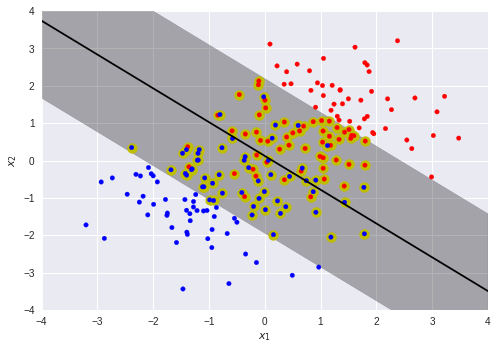

In [10]:
np.random.seed(4)
X2 = np.hstack((np.random.normal(1, 1, (2,100)), np.random.normal(-1, 1, (2, 100))))
y2 = np.hstack((np.ones((1,100)), np.zeros((1,100))))

plot_SVC(X2, y2, 0.01)

The above plot shows a support vector machine dividing two overlapping classes.  Again, support vectors are highlighted in yellow.  Every observation requiring some slack, whether because it is in the margin or on the wrong side of the hyperplane, is a support vector.

By increasing the number of support vectors, a SVM reduces its variance, since it depends less on any individual observation.  This can be useful even when the classes are separable.  Obverse what happens in the previous case as $C$ is changed.  Note that the two classes were draw from Gaussians centered at (1,1) and (-1,-1), so a classifer working with infinite observations would draw the boundary $x_2 = -x_1$.

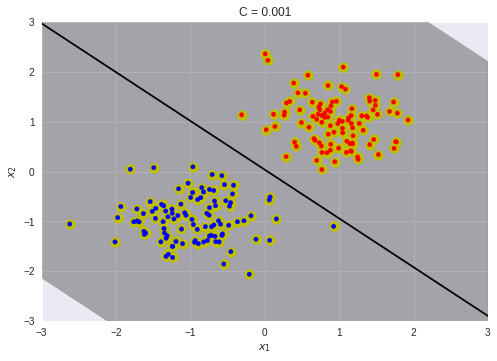

In [13]:
from ipywidgets import interact

def plot_SVC_log10C(log10C=1):
    C = 10**log10C
    plot_SVC(X1, y1, C)
    plt.title('C = %g' % C)

interact(plot_SVC_log10C, log10C=(-3, 2, 1))

**Question:** How do you select the correct value of $C$?

### Implementation details

We can rewrite the constrained optimization problem as the primal Lagrangian function with Lagrange multipliers $\alpha_j \ge 0$ and $\mu_j \ge 0$ for our two constraints:

$$ \min_{\beta, \beta_0, \xi} \max_{\alpha, \mu} \left[
L_P = \frac{1}{2} \| \beta \|^2 + C \sum_j \xi_j - \sum_j \alpha_j \left[y_j (X_{j \cdot} \cdot \beta + \beta_0 - (1-\xi_j)\right] - \sum_j \mu_j \xi_j \right] \, . $$

By minimizing w.r.t. $\beta$, $\beta_0$, and $\xi_j$, we can obtain the dual Lagrangian formulation:

$$ \max_{\alpha} \left[
L_D =  \sum_j \alpha_j - \frac{1}{2} \sum_{j, j'} \alpha_j \alpha_{j'} y_j y_{j'} X_{j \cdot} \cdot X_{j' \cdot} \right] \\
\mbox{subject to } \left\{ \begin{array} {cl} 
0 = \sum_j \alpha_j y_j \\
0 \le \alpha_j \le C & \mbox{for } j = 1,\ldots,N
\end{array}\right. \, .
$$

This is now a reasonably straightforward quadratic programming problem, solved via [Sequential Minimization Optimization](https://en.wikipedia.org/wiki/Sequential_minimal_optimization).  Once we have solved this problem for $\alpha$, we can easily work out the coefficients from

$$ \beta = \sum_j \alpha_j y_j X_{j \cdot} \, . $$

**Key takeaways**:
1. Critically, only points inside the margin or on the wrong side of the margin ($j$ for which $\xi_j > 0$) affect the SVM (see the picture).  This is intuitively clear from the picture.  In the dual form, this is because $\alpha_j$ is the Lagrangian constraint corresponding to $y_j (X_{j\cdot} \cdot \beta + \beta_0) \ge (1-\xi_j)$ and Complementary Slackness shows tells us that $\alpha_j > 0$ is non-zero only when the constraint is binding ($y_j (X_{j\cdot} \cdot \beta + \beta_0) = (1-\xi_j)$), i.e. we're in the boundary region.  Only these support vectors contribute to the solution.
1. $C$ gives a trade-off between the amount of forgiveness and the size of the margin or boundary region.  Hence, it controls how many points affect the SVM (based on the distance from the boundary).

## Non-linear SVM

What if we don't believe that our data can be cleanly split by a linear hyperplane?  The common way to incorporate non-linear features is to have a non-linear function $h$ to map the features to another (possibly higher-dimensional) space, where the data are linearly separable.  The intuition here is that the measured feature space is a projection of this higher-dimensional space, and nonlinearities in the projection result in the nonlinear boundary between classes.

### Kernel trick

The *kernel* of the SVM is the dot product of the feature vectors in the dual Lagrangian.  If we use the transformed features $h(X_{j \cdot})$, the dual Lagrangian becomes

$$ L_D = \sum_j \alpha_j - \frac{1}{2} \sum_j \sum_{j'} \alpha_j \alpha_{j'} y_j y_{j'} h(X_{j \cdot}) \cdot h(X_{j' \cdot}) \, . $$

Rather than directly computing the (potentially very large) vectors $h(X_{j \cdot})$, we can just calculate the kernel directly:

$$h(X_{j \cdot}) \cdot h(X_{j' \cdot})  = K(X_{j \cdot}, X_{j' \cdot}) \, ,$$ 

for some non-linear kernel $K$.  Our problem then becomes

$$ \max_{\alpha} \left[ \sum_j \alpha_j - \frac{1}{2} \sum_j \sum_{j'} \alpha_j \alpha_{j'} y_j y_{j'} K(X_{j \cdot}, X_{j' \cdot}) \right] \, .$$

There's a one-to-one correspondence between kernel functions and functions $h$ (although $h$'s range may be infinite dimensional).  Some common kernels include

<table>
<tr>
<th>Kernel</th>
<th>$K(x,x')$</th>
<th>Scikit `kernel` parameter</th>
</tr>

<tr>
<td>Linear Kernel</td>
<td>$x \cdot x'$</td>
<td>`kernel='linear'`</td>
</tr>

<tr>
<td>$d$-th Degree Polynomial</td>
<td>$(r + \gamma\, x \cdot x')^d$</td>
<td>`kernel='poly'`</td>
</tr>

<tr>
<td>Radial Kernel</td>
<td>$ \exp(- \gamma\, \|x - x' \|^2) $</td>
<td>`kernel='rbf'`</td>
</tr>

<tr>
<td>Neural Network Kernel</td>
<td>$\tanh(\gamma\, x \cdot x' + r)$</td>
<td>`kernel='sigmoid'`</td>
</tr>
</table>

The benefit of using a kernel is that we don't have to compute a very high-dimensional (possibly infinite-dimensional) $h$.  All that complexity is just wrapped into the function $K$.

Visualization ([YouTube](https://www.youtube.com/watch?v=3liCbRZPrZA))

For more information on which parameters to pass the kernel, checkout [the Scikit documentation](http://scikit-learn.org/stable/modules/svm.html#svm-kernels).

**Exercise:** Use non-linear kernels to produce a better classfication boundary between the two classes below.

(-0.5, 1.0)

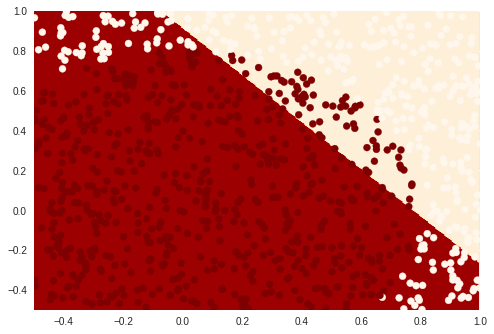

In [14]:
x_min = -.5
x_max = 1.

# we only take the first two features for visualization
X = np.random.uniform(x_min, x_max, size=[1000,2])
y = np.linalg.norm(X, axis=1) < .8

#set our error margin
C=1
# linear kernel classifier
clf = svm.SVC(kernel='linear', C=C).fit(X, y)

# create a mesh to plot for clf values
h = .005  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(x_min, x_max, h))

# predicted values
zz = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, zz, cmap=plt.cm.OrRd)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.OrRd)
plt.xlim([x_min,x_max])
plt.ylim([x_min,x_max])

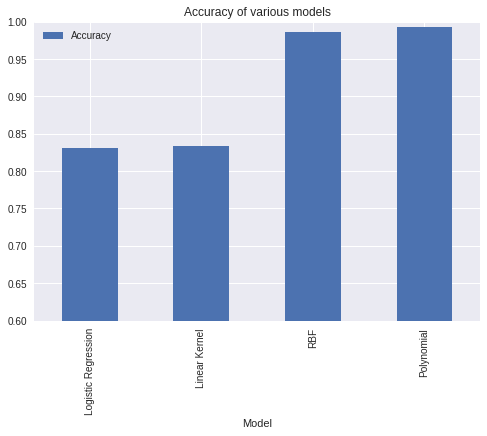

In [15]:
# Sample code to test SVM Classification

from sklearn import linear_model, model_selection, metrics, random_projection
import pandas as pd

cv = model_selection.ShuffleSplit(n_splits=3, test_size=0.25, random_state=42)
C = 1.0

models = [
    ("Logistic Regression", linear_model.LogisticRegression()),
    ("Linear Kernel", svm.SVC(kernel='linear', C=C)),
    ("RBF", svm.SVC(kernel='rbf', C=C)),
    ("Polynomial", svm.SVC(kernel='poly', degree=2))
]

pd.DataFrame([
    (name, model_selection.cross_val_score(clf, X, y, scoring='accuracy', cv=cv).mean()) for name, clf in models
], columns=["Model", "Accuracy"]).plot(x="Model", y="Accuracy", kind="bar", title="Accuracy of various models", ylim=[.6,1.])

**Questions**:
1. Given a trained SVM model, how would you make predictions?  Are you able to compute the values for $\beta$?.
1. How does the memory and time scale with $n$, the number of samples, and $p$, the number of features for each kernel $K$?
1. How might we reduce the computation time if one class contains the majority of samples?
1. What happens if each of the features is on a very different scale?  How could you correct for this?
1. Which of these kernels would benefit from subtracting the mean of each feature fom the data?

## Multi-class SVM

To do multi-class SVM, recall that there are generally two strategies, One-versus-One, and One-versus-All.  [Scikit uses One-versus-One (sometimes called All-versus-All strategy)](http://scikit-learn.org/stable/modules/multiclass.html).  If $f_{ij}$ is the classifier value where $i$ is a positive label ($y=1$) and $j$ is a negative label ($y=-1$), then we choose
$$ \mbox{argmax}_i \sum_{j \neq i} f_{ij}$$

**Question**:
1. Why would you choose One-versus-One or One-versus-All?  (One-versus-All requires more memory and everyone claims SVM is super-linear in memory so we're willing to run more simulations).
1. Can you improve the accuracy by taking some of the steps outlined above?
1. Modify the above code to do the full multi-class SVM (`SVC` automatically does multiple classes, you just have to feed in all the data).

## Approximating kernels

The problem with the Kernel trick is that the memory required for $K$ is $O(n^2)$ and this can be both slow to compute over and expensive memory-wise.  Instead, we might choose to transform our data via an approximation $\tilde h$ of the transformation function $h$.  For example, Scikit's `kernel_approximation.Nystroem` provides transformations that approximate each of the non-linear kernels.  Once you have the transformed features, you can pass them to `svm.LinearSVC` class to compute a linear support vector machine.

For more information [Kernel Approximation](http://scikit-learn.org/stable/modules/kernel_approximation.html)

**Exercise**: Load the MNIST Digits dataset.  This is a dataset of handwritten digits 0 - 9 that is used as a canonical training example:

```
digits = datasets.fetch_mldata('mnist-original')
X = digits.data
y = digits.target
```

1. Try to build build a classifier using `svm.SVC` with a non-linear Kernel.  It will just take a long time ...
1. Use `kernel_approximation.Nystroem` and `svm.LinearSVC` chained together via `pipeline.Pipeline` to build a tractable classifier.  Use grid_search to find optimal parameters.  *Hint:* to build up the learner, first restrict the number of classes and the number of examples and then slowly lift those restrictions.

## Support Vector Regression

Support vector machines are also sometimes used to solve regression problems.  In regression, $y$ takes on real values instead of just $\pm 1$.  In the classification case, we penalized the term for being either inside or on the *wrong* side of the margin (**Hinge Loss**).  In regression, we want to penalize for being too far away from the predicted value, regardless of whether you are above or below the margin  (**Well Loss**).  Below, we give a plot of the two:

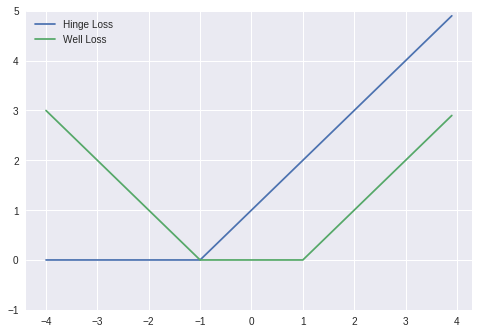

In [16]:
# Plot of the two loss functions

from matplotlib import pyplot as plt

def hinge_loss(x):
    return np.maximum(0, x+1.)

def well_loss(x):
    return np.maximum(0, np.abs(x)-1.)

x = np.arange(-4, 4, .1)
plt.plot(x, hinge_loss(x), label="Hinge Loss")
plt.plot(x, well_loss(x), label="Well Loss")
plt.ylim([-1, 5])
plt.legend(loc="upper left")
plt.show()

### Mathematics of SVM Loss

$$
\min_{\beta, \beta_0, \xi_j, \xi_j^*} \left [ \frac 1 2 \|\beta\|^2 + C \sum_j (\xi_j + \xi_j^*) \right]\\
\mbox{subject to } \left\{ \begin{array} {cl} 
 y_j - X_{j\cdot} \cdot \beta - \beta_0 \le \epsilon + \xi_j & \mbox{for } j = 1,\ldots,N \\
 X_{j\cdot} \cdot \beta + \beta_0 - y_j \le \epsilon + \xi_j^* & \mbox{for } j = 1,\ldots,N \\
 \xi_j \ge 0 & \mbox{for } j = 1,\ldots,N \\
 \xi_j^* \ge 0 & \mbox{for } j = 1,\ldots,N
\end{array}\right.
$$

We can perform a similar calculations to incorporate the kernel for a new feature map $h$ and a dual quadratic programming problem.  [Here's a simple article that gives some of the details](http://alex.smola.org/papers/2003/SmoSch03b.pdf).  

$$ \max_{\alpha} \left[
L_D(\gamma) = \sum_j y_j (\alpha_j - \alpha_j^*) - \epsilon \sum_j (\alpha_j - \alpha_j^*) - \frac{1}{2} \sum_{j, j'} (\alpha_j - \alpha_j^*) (\alpha_{j'} - \alpha_{j'}^*) K(X_{j \cdot}, X_{j' \cdot}) \right] \\
\mbox{subject to } \left\{ \begin{array} {cl} 
0 = \sum_j (\alpha_j -\alpha_j^*) \\
0 \le \alpha_j \le \gamma & \mbox{for } j = 1,\ldots,N \\
0 \le \alpha_j^* \le \gamma & \mbox{for } j = 1,\ldots,N
\end{array}\right.
$$

where $\alpha_j$ and $\alpha_j^*$ are the dual for $\xi_j$ and $\xi_j^*$.  The weights are given by
$$ \beta = \sum_j (\alpha_j - \alpha_j^*) h(X_{j\cdot})\,. $$

Details are available in the [sklearn documentation](http://scikit-learn.org/stable/modules/svm.html#regression).

**Question**:
1. Can you write the prediction function $f(x)$ in terms of the kernel $K$?

## Outlier detection using SVM

A classic application of SVM is Outlier Detection (see the [Outlier Detection](AM_Outlier_Detection.ipynb) notebook), which is actually an Unsupervised Learning technique.  The reason it is unsupervised is that one usually has data for "normal" times (**inliers**) but not data for "abnormal" times (**outliers**).  For example, you might be looking at server logs for either abnormally high activity that might indicate security breaches or a failure in your code.  One doesn't really understand what those failure modes are *a priori*.  What you do have is a lot of log data for when the server is behaving normally.

There's a well-known modification to a two-class SVM with a Radial Kernel turning it into a *single-class* SVM by Schölkopf.  Mathematically, it is expressed as

$$
\min_{\beta, \xi, \rho} \frac{1}{2} \|\beta\|^2 + \frac{1}{\nu n}\sum_{j=1}^n \xi_j - \rho \\
\mbox{subject to } \left\{ \begin{array} {cl} 
 h(X_{j\cdot}) \cdot \beta \ge \rho -\xi_j & \mbox{for } j = 1,\ldots,N \\
 \xi_j \ge 0 & \mbox{for } j = 1,\ldots,N
\end{array}\right.
$$

Notice that we are maximizing the value of $\rho$ and that $\rho$ forms a lower bound for $h(X_{j\cdot}) \cdot \beta$ in our constraint.  Hence, we are pushing the points away from the origin in the transformed feature space (of course, there is the usual forgiveness in terms of $\xi$'s).  Hence, instead of penalizing for being on the "wrong" side of the margin for a two-sided problem, we try to push the transformed features as far from the origin as possible.  In the original feature space, this creates a region near the training points which are considered "regular".  You can read more about this in the [Scikit Documentation](http://scikit-learn.org/stable/modules/outlier_detection.html).

Observe that there is a parameter $\nu$ that needs to be set.  This number sets both
1. An upper bound on the fraction of training errors - training examples eroneously labeled as outliers.
1. A lower bound of the fraction of support vectors - number of non-zero $\xi$'s or $\alpha$'s.

$\nu$ has to be set by the modeller and controls the number of false positives (training examples eroneously) and false negatives (although it is hard to know when a false negative occurs without training data).

**Question:** Why are these two notions equivalent?

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm

xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
# Generate train data
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
# Generate some regular novel observations
X = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

# fit the model
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

# or, see next
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

In [18]:
# check performance
def proportion_outliers(y):
    """Given estimator predictions (1=in class, -1=outlier),
    obtain proportion of outliers"""
    return float(sum(y==-1))/len(y)

In [19]:
print (proportion_outliers(y_pred_test),
       proportion_outliers(y_pred_train),
       proportion_outliers(y_pred_outliers))

(0.225, 0.1, 0.95)


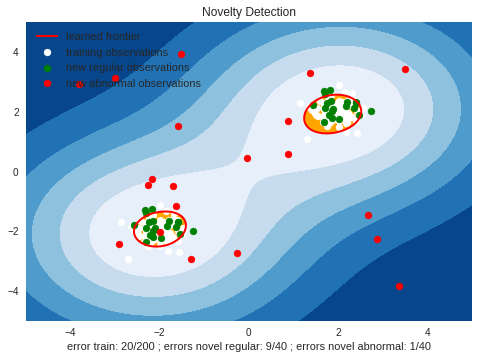

In [20]:
# plot the line, the points, and the nearest vectors to the plane
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("Novelty Detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.Blues_r)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='red')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='orange')

b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a.collections[0], b1, b2, c],
           ["learned frontier", "training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left",
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.xlabel(
    "error train: %d/200 ; errors novel regular: %d/40 ; "
    "errors novel abnormal: %d/40"
    % (n_error_train, n_error_test, n_error_outliers))
plt.show()

### Exit Tickets
1. What information does an SVM model retain in memory after training?
1. How do you decide which kernel to use?
1. Explain to a layman what the advantages and drawbacks are of including a large margin in your optimization criteria.

### Spoilers

In [ ]:
""" commented out to prevent hitting fetch_mldata unnecessarily
from sklearn import svm, datasets, model_selection, kernel_approximation, pipeline, preprocessing, random_projection
from sklearn.datasets import fetch_mldata

digits = datasets.fetch_mldata('mnist-original')

X = digits.data
y = digits.target

X = X[y < 4]
y = y[y < 4]

N_SAMPLE=4000

# shuffle the data, it'
np.random.seed(42)
indices = np.arange(len(y))
np.random.shuffle(indices)
X = np.array(X[indices[:N_SAMPLE], :], dtype=float)
y = y[indices[:N_SAMPLE]]

model = pipeline.Pipeline([
    ("Kernel Approximation", kernel_approximation.Nystroem(kernel='poly', gamma=1e-1, degree=2)),
    ("Linear SVC", svm.LinearSVC(C=1e1))
])

cv = model_selection.KFold(n_splits=5)
model_selection.cross_val_score(model, X, y, scoring='accuracy', cv=cv).mean()
"""

1. For a trained model they are simply the values $\alpha$.  Here's a subtle trick: in a linear model, predicting the values of a linear SVM comes from $x \cdot \beta = \sum_{\alpha_j} y_j X_{j \cdot} \cdot x$.  For a nonlinear SVM, this can be generalized to $\sum_{\alpha_j} y_j K(X_{j \cdot}, x)$
1. (According to the Scikit documentation, this takes [between $O(pn^2)$ and $O(pn^3)$ time](http://scikit-learn.org/stable/modules/svm.html#complexity).  It's easy to see the latter (think about the cost of computing the objective function).
1. Downsampling the more frequently occurring class and increase its `weight` accordingly
1. For each of the kernels, $\gamma$ determines a characteristic scale-length.  Look at the distribution of $x \cdot x'$ or $\|x - x'\|^2$ in your data and choose $\gamma$ roughly as the inverse standard deviation.
1. All the ones that involve an inner product, not the one that involves the difference of features.  Note that $r$ can be aliased to the mean.

*Copyright &copy; 2015 The Data Incubator.  All rights reserved.*